STC 510 - Module 3 Essentials Badge Assignment

Michael O'Donnell - 01/26/2024

For this assignment, I will be drawing on multiple sources of data to compare to the crime data that we looked at for our last assignment. I will be loading in that data once again while also loading in the data I decide to compare it to, to see if there are any correlations among the data. 

To help find categories of data that could correlate with our crime data set, I used this Wikipedia article to help give me ideas of what datasets I could try to find for comparison. 

https://en.wikipedia.org/wiki/Correlates_of_crime

To start off the comparison, I found this data set of Pheonix area housing prices for 2021

https://www.kaggle.com/datasets/antoniong203/arizona-houses-2021

This is not the best comparison becuase the dates do not match and the data set is not very large. But housing prices in this case can be a proxy for socioeconomic status and allow me to compare the median home price per zip versus the median amount of crimes per zip to see if there is a correlation between the two. 

To begin with the comparison, I first need to import the python modules and the datasets I need. 

In [1]:
#Import statements 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Importing the crime dataset 
#I copied the declaration from my module 3 basics assignment
crime_df = pd.read_csv('crimestats.csv',on_bad_lines='skip',engine='python')

In [3]:
#Drop rows with empty data
crime_df.dropna(inplace=True)

In [4]:
#importing housing prices dataset from a CSV
#I am going to use the same methods I used for the crime datset incase there is bad data
house_prices_df = pd.read_csv('AZhousingData.csv',on_bad_lines='skip',engine='python')

In [5]:
#Dropping rows with empty data
house_prices_df.dropna(inplace=True)

Now that the datasets have been imported, I can start gathering and preparing the data I need for comparison. For the crime dataset, I want to find the median number of crimes per zip and for the house prices I will use each price that is listed for the zipcode to represent the zipcode overall (we will later see this is biased and problematic). I was debating on pulling the median crimes per zip for one year only, but I think it could be useful to include the data for all the years each zip has to give a fuller picture of the number of crimes that occur per zip.

In [87]:
#Using the groupby method so I can anaylze the zipcode and crimes
crime_zip = crime_df.groupby('ZIP')

In [88]:
#comparing the crimes to the zip code groupby dataframe
crime_zip['UCR CRIME CATEGORY'].value_counts()

ZIP      UCR CRIME CATEGORY 
85003.0  LARCENY-THEFT          537
         BURGLARY               145
         MOTOR VEHICLE THEFT    105
         DRUG OFFENSE            78
         AGGRAVATED ASSAULT      58
                               ... 
85392.0  AGGRAVATED ASSAULT       1
85395.0  AGGRAVATED ASSAULT       1
85396.0  BURGLARY                 1
         LARCENY-THEFT            1
         MOTOR VEHICLE THEFT      1
Name: count, Length: 523, dtype: int64

In [89]:
#Making a new dataframe with the crime counts per crime per zip for further grouping. 
crime_count_df = pd.DataFrame(crime_zip['UCR CRIME CATEGORY'].value_counts())

In [90]:
#Displing the new dataframe
crime_count_df

count
ZIP     UCR CRIME CATEGORY        
85003.0 LARCENY-THEFT          537
        BURGLARY               145
        MOTOR VEHICLE THEFT    105
        DRUG OFFENSE            78
        AGGRAVATED ASSAULT      58
...                            ...
85392.0 AGGRAVATED ASSAULT       1
85395.0 AGGRAVATED ASSAULT       1
85396.0 BURGLARY                 1
        LARCENY-THEFT            1
        MOTOR VEHICLE THEFT      1

[523 rows x 1 columns]

In [91]:
#making a new groupby datframe so I can get the median number of all crimes per zip
total_crime = crime_count_df.groupby('ZIP').median()

In [92]:
#displaying the new dataframe
total_crime

,count
ZIP,
85003.0,58.0
85004.0,45.5
85006.0,78.0
85007.0,118.0
85008.0,166.0
...,...
85382.0,1.0
85383.0,1.0
85392.0,1.5


Now that I have the median amount of crimes per zip code, I can move on to preparing the housing data where I am looking at each house price per zip code that was in the dataset. This will follow a similar logic to what I did above for the crime data.

In [93]:
#displaying the intial dataframe for reference
house_prices_df

,Price,address,Local_area,zipcode,beds,baths,sqft,url
0,229900,11444 N 28th Dr APT 14,Phoenix,85029,2.0,3.0,1498.0,https://www.zillow.com/homedetails/11444-N-28t...
1,294900,107 W Camino Rancho Lucido,Sahuarita,85629,4.0,3.0,1951.0,https://www.zillow.com/homedetails/107-W-Camin...
2,683100,3320 E Briarwood Ter,Phoenix,85048,4.0,4.0,3110.0,https://www.zillow.com/homedetails/3320-E-Bria...
3,260000,2401 N 70th St APT H,Scottsdale,85257,2.0,1.0,759.0,https://www.zillow.com/homedetails/2401-N-70th...
4,290900,3781 E Sierrita Rd,San Tan Valley,85143,2.0,2.0,1052.0,https://www.zillow.com/homedetails/3781-E-Sier...
...,...,...,...,...,...,...,...,...
558,499000,7024 W TOWNLEY Avenue,Peoria,85345,4.0,3.0,2608.0,https://www.point2homes.com/US/Home-For-Sale/A...
559,345990,2036 E JULIAN Drive,Casa Grande,85122,4.0,2.0,1880.0,https://www.point2homes.com/US/Home-For-Sale/A...
560,355000,7636 E Buena Vista Drive,Prescott Valley,86314,3.0,2.0,1286.0,https://www.point2homes.com/US/Home-For-Sale/A...
561,700000,16610 South 37th Way,Phoenix,85048,5.0,3.0,3250.0,https://www.point2homes.com/US/Home-For-Sale/A...


In [94]:
#Creating a groupby dataframe with the zipcode for further analysis with price
home_zips = house_prices_df.groupby('zipcode')

In [95]:
#Getting the median price for zip code and grouping them together
total_price = home_zips['Price'].median()

In [96]:
#displaying the new dataframe
total_price

zipcode
85006             299000.0
85007            1087500.0
85008             570000.0
85012            1900000.0
85014             599000.0
                   ...    
86409             162000.0
86413             105000.0
86426             264900.0
86442             379900.0
Apache County     397500.0
Name: Price, Length: 204, dtype: float64

With the median price per zip listed, I can now move on to comparing the data

In [97]:
#views which type of dataframe total_price is, which will be important later on 
type(total_price)

pandas.core.series.Series

In [98]:
#I do the same with the total_crime df
type(total_crime)

pandas.core.frame.DataFrame

To compare the data, I will have to make sure both new datasets are of the same data type. 

In [99]:
#converting total_price to a new dataframe
total_price_df = pd.DataFrame(total_price)

In [100]:
#displaying dataframe
total_price_df

,Price
zipcode,
85006,299000.0
85007,1087500.0
85008,570000.0
85012,1900000.0
85014,599000.0
...,...
86409,162000.0
86413,105000.0
86426,264900.0


In [101]:
#displaying the type of the new dataframe
type(total_price_df)

pandas.core.frame.DataFrame

Both datasets are now the same datatype

But now I must rename some columns in both dataframes so they can be matched up later when the dataframes are added together. 

I used this article for help:

https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/#

In [102]:
#renaming the index to zipcode, for some reason python wasn't recognizing the first column name
total_crime = total_crime.rename_axis('zipcode')

In [103]:
#renaming the crime count to MedianCrimeCount 
total_crime.rename(columns = {'count':'MedianCrimeCount'}, inplace=True)

In [104]:
#displaying the dataframe
total_crime

,MedianCrimeCount
zipcode,
85003.0,58.0
85004.0,45.5
85006.0,78.0
85007.0,118.0
85008.0,166.0
...,...
85382.0,1.0
85383.0,1.0
85392.0,1.5


In [105]:
#Doing the same thing for the total_price_df that has our house price info
total_price_df.rename(columns = {'Price':'HousePrice'}, inplace=True)

In [106]:
#same as above
total_price_df = total_price_df.rename_axis('zipcode')

In [107]:
#printing the newly name dataframe
total_price_df

,HousePrice
zipcode,
85006,299000.0
85007,1087500.0
85008,570000.0
85012,1900000.0
85014,599000.0
...,...
86409,162000.0
86413,105000.0
86426,264900.0


In [108]:
#Drops the row with the zip of Apache County since it did not match the rest of the data
total_price_df = total_price_df[total_price_df.index != 'Apache County']

In [109]:
#Prints the dataframe again to show its gone
total_price_df

,HousePrice
zipcode,
85006,299000.0
85007,1087500.0
85008,570000.0
85012,1900000.0
85014,599000.0
...,...
86406,500000.0
86409,162000.0
86413,105000.0


In [110]:
#Converts the total_price_df zipcodes to a float since the total_crime df zips are float and they need to be the same datatype to match when
#joined together
total_price_df.index = total_price_df.index.astype(float)

In [111]:
#shows the dataframe
total_price_df

,HousePrice
zipcode,
85006.0,299000.0
85007.0,1087500.0
85008.0,570000.0
85012.0,1900000.0
85014.0,599000.0
...,...
86406.0,500000.0
86409.0,162000.0
86413.0,105000.0


Now I can combine the dataframes. I used this resource for help:

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [112]:
#merges both dataframes to a new dataframe called house_crime on the zipcode column
#only the zips that had data were matched, we can see we lost rows of data between the dataframes
house_crime = pd.merge(total_crime, total_price_df, on='zipcode', how='inner')

In [113]:
#prints the new dataframe which we will use for data analysis
house_crime

,MedianCrimeCount,HousePrice
zipcode,,
85006.0,78.0,299000.0
85007.0,118.0,1087500.0
85008.0,166.0,570000.0
85012.0,18.5,1900000.0
85014.0,50.0,599000.0
...,...,...
85382.0,1.0,675000.0
85383.0,1.0,539100.0
85392.0,1.5,368450.0


Now I can use the cleaned data in the new dataframe for data analysis and visualization

In [114]:
#I installed seaborn becuase matplotlib was too restrictive for what I wanted to do
#pip install seaborn

In [115]:
#importing seaborn to graph the data
import seaborn as sns

/tmp/ipykernel_3190/1056100363.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  house_price_chart.set_xticklabels(house_price_chart.get_xticklabels(), rotation=90)


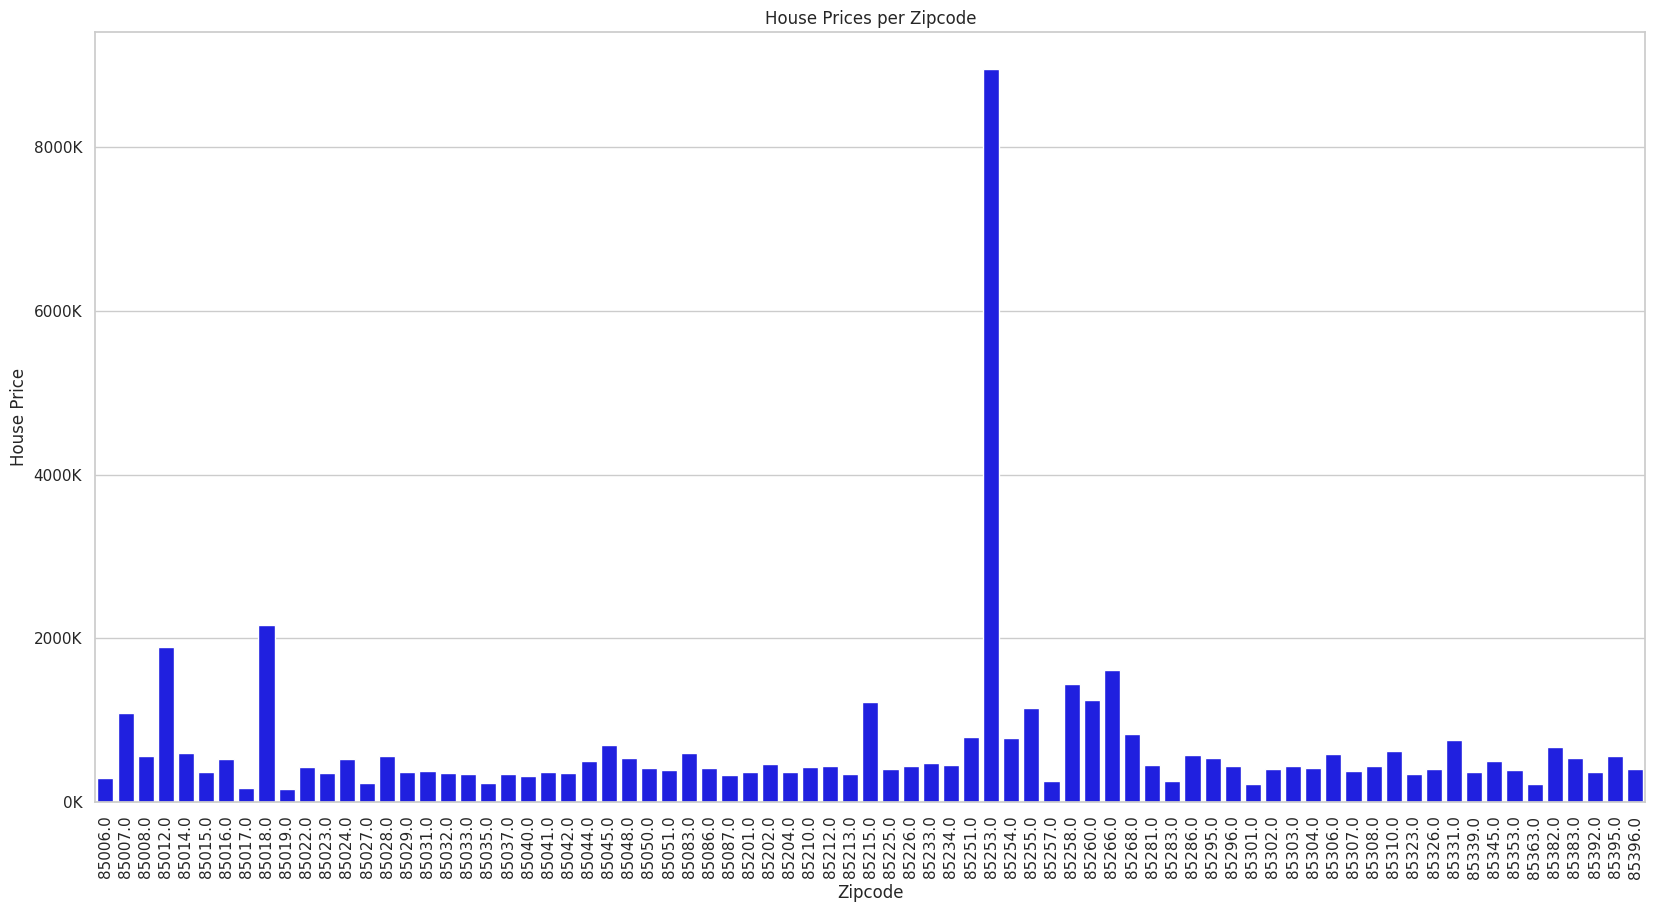

In [116]:
#from matplotlib.ticker import ScalarFormatter so I can scale the Y axis
from matplotlib.ticker import FuncFormatter
#determines graph size
plt.figure(figsize=(20, 10))
#decides what dataset to use and which axises the data should go on. Also sets the color
house_price_chart = sns.barplot(x='zipcode', y='HousePrice', data=house_crime, color='blue')
#makes label names for the graph
house_price_chart.set(title='House Prices per Zipcode', xlabel='Zipcode', ylabel='House Price')

#formats y-axis labels to display in thousands
def price_formatter(x, pos):
    return f'{x/1000:.0f}K'

#takes the function and runs it through so the graph displays the numbers in thousands instead of scientific notation
house_price_chart.yaxis.set_major_formatter(FuncFormatter(price_formatter))

#Rotates the labels of the zipcode to vertical to make the graph more legible
house_price_chart.set_xticklabels(house_price_chart.get_xticklabels(), rotation=90)

#displays the graph
plt.show()

/tmp/ipykernel_3190/2949955477.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  crime_count_chart.set_xticklabels(crime_count_chart.get_xticklabels(), rotation=90)


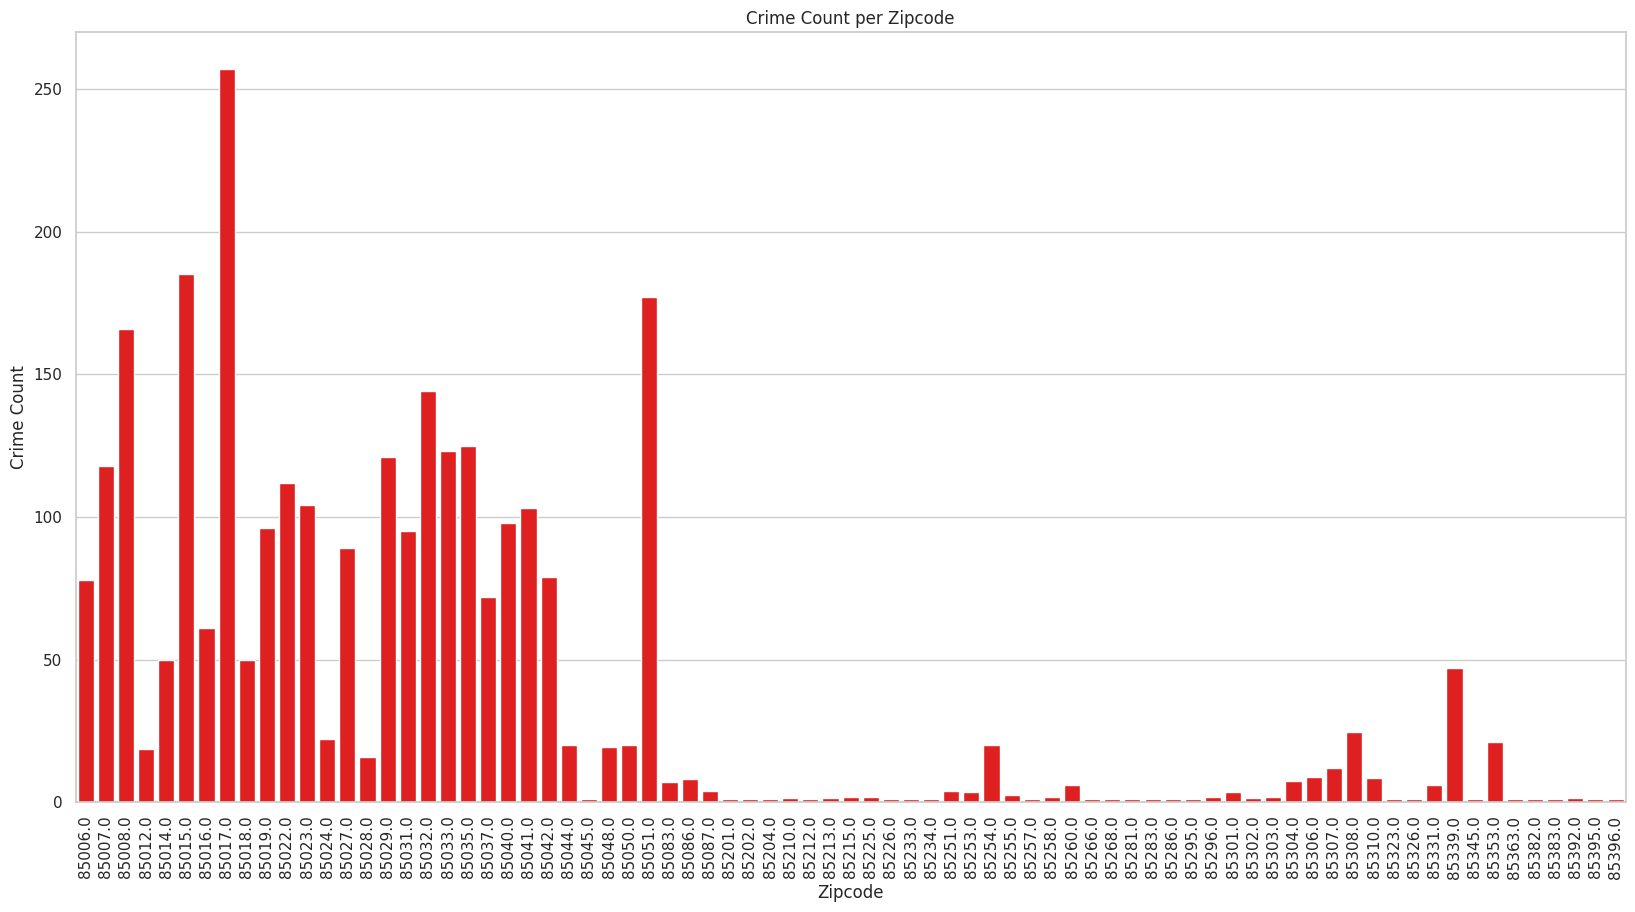

In [117]:
#creates a bar chart for crime count per zipcode with vertical labels
#i am not going to comment as much for the next graphs out of redunancy
plt.figure(figsize=(20, 10))
crime_count_chart = sns.barplot(x='zipcode', y='MedianCrimeCount', data=house_crime, color='red')
crime_count_chart.set(title='Crime Count per Zipcode', xlabel='Zipcode', ylabel='Crime Count')
crime_count_chart.set_xticklabels(crime_count_chart.get_xticklabels(), rotation=90) 
plt.show()

/tmp/ipykernel_3190/2535952637.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  house_price_scatter.set_xticklabels(house_price_scatter.get_xticklabels(), rotation=90)


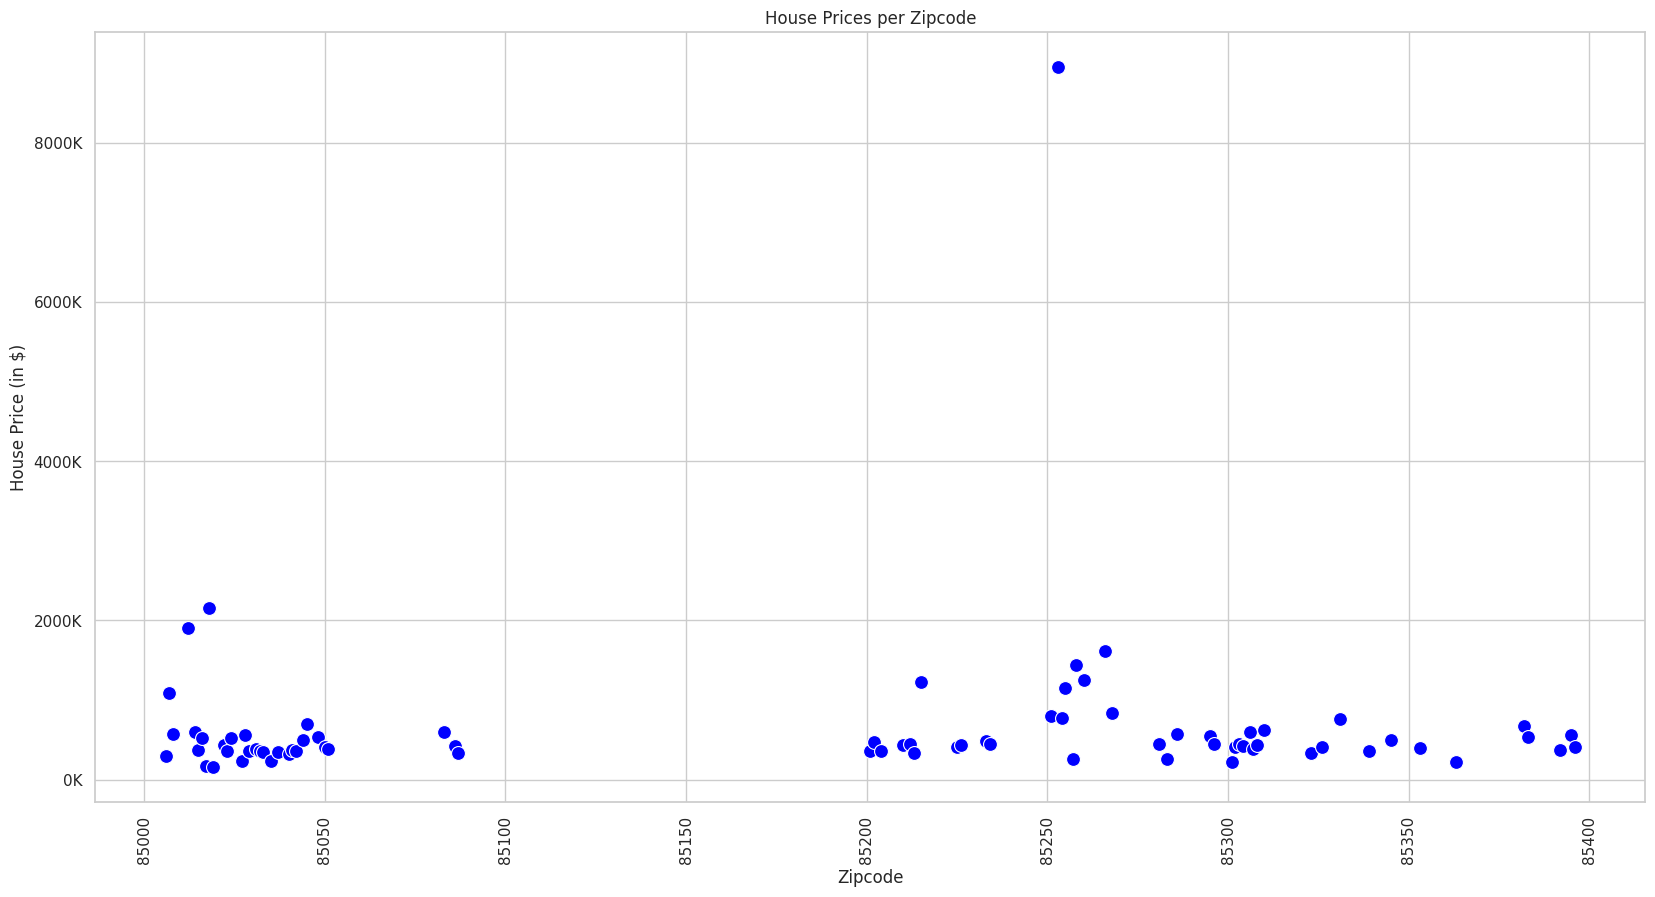

In [118]:
#Scatter plot for housing prices
plt.figure(figsize=(20, 10))
house_price_scatter = sns.scatterplot(x='zipcode', y='HousePrice', data=house_crime, color='blue', s=100)
house_price_scatter.set(title='House Prices per Zipcode', xlabel='Zipcode', ylabel='House Price (in $)')

def price_formatter(x, pos):
    return f'{x/1000:.0f}K'

house_price_scatter.yaxis.set_major_formatter(FuncFormatter(price_formatter))

house_price_scatter.set_xticklabels(house_price_scatter.get_xticklabels(), rotation=90)

plt.show()

/tmp/ipykernel_3190/1052222531.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  crime_count_scatter.set_xticklabels(crime_count_scatter.get_xticklabels(), rotation=90)


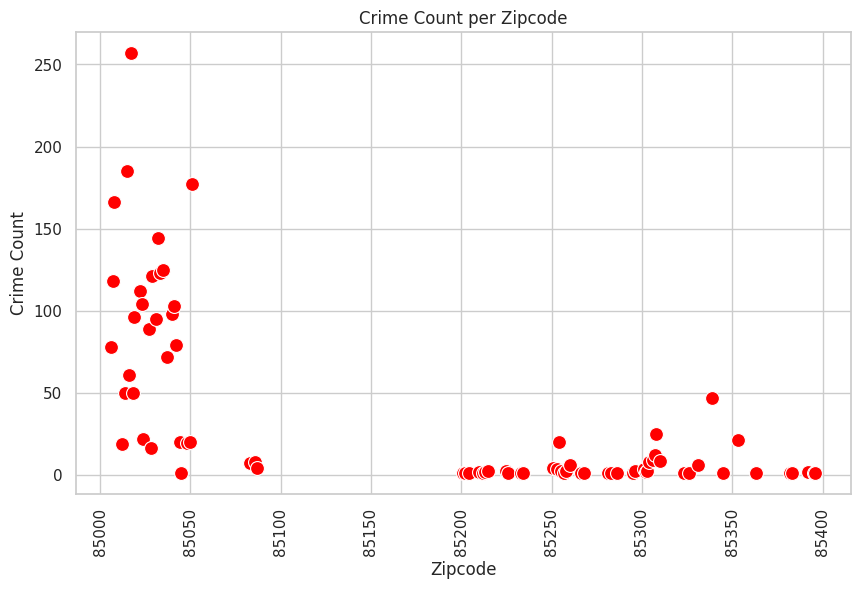

In [119]:
#scatter plot for crime count per zipcode
plt.figure(figsize=(10, 6))
crime_count_scatter = sns.scatterplot(x='zipcode', y='MedianCrimeCount', data=house_crime, color='red', s=100)
crime_count_scatter.set(title='Crime Count per Zipcode', xlabel='Zipcode', ylabel='Crime Count')

crime_count_scatter.set_xticklabels(crime_count_scatter.get_xticklabels(), rotation=90)

plt.show()

In [120]:
#prints the cleaned dataset I used to CSV
house_crime.to_csv('EssentialsDataset.csv')

Data Analysis 

Looking at both the bar charts and scatter plots, it is evident in this dataset that there is not a correlation between housing prices and crime count per zipcode. I would have expected completely different results, this may be from my own bias or the bias of the housing dataset. The housing data set only took around 1 house per zip I believe from the site Zillow and I used that price for the zip. So I actually used biased data because that one house could have been cherry picked and not representative of the median housing price per zipcode. 

I don't consider this project from a failure from a programming point of view, but from a data point of view I think this would need to go back to the drawing boards to get the median housing prices per zipcode. And Zillow is probably not the best way to collect that data either. If we come back to this project, I would like to expand on my failures to see if I get different results. 